# Richo Annajmawan

## Starbucks Customer Survey Analysis

### IMPORT LIBRARY

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, roc_auc_score, f1_score, recall_score,plot_confusion_matrix,plot_roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import  XGBClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from yellowbrick.model_selection import FeatureImportances, LearningCurve
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


### LOAD DATASET

In [2]:
data = pd.read_csv('Starbucks satisfactory survey.csv')
data = data.dropna()
data.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


## Data Columns
0. Timestamp
1. Your Gender	
2. Your Age	
3. Are you currently....?	
4. What is your annual income?	
5. How often do you visit Starbucks?	
6. How do you usually enjoy Starbucks?	
7. How much time do you normally spend during your visit?	
8. The nearest Starbucks's outlet to you is...?	
9. Do you have Starbucks membership card?
10. What do you most frequently purchase at Starbucks?
11. On average, how much would you spend at Starbucks per visit?	
12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:	
13. How would you rate the price range at Starbucks?	
14. How important are sales and promotions in your purchase decision?	
15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)	
16. You rate the WiFi quality at Starbucks as..	
17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)	
18. How likely you will choose Starbucks for doing business meetings or hangout with friends?	
19. How do you come to hear of promotions at Starbucks? Check all that apply.	
20. Will you continue buying at Starbucks?

In [3]:
data.shape

(121, 21)

### CHECK MISSING VALUE

In [4]:
#cek missing value -> Mendeteksi missing value menggunakan NA
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(data.shape[0]-missing_data['missing values'])/data.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,Timestamp,0,100.0
1,18. How likely you will choose Starbucks for d...,0,100.0
2,17. How would you rate the service at Starbuck...,0,100.0
3,16. You rate the WiFi quality at Starbucks as..,0,100.0
4,15. How would you rate the ambiance at Starbuc...,0,100.0
5,14. How important are sales and promotions in ...,0,100.0
6,13. How would you rate the price range at Star...,0,100.0
7,12. How would you rate the quality of Starbuck...,0,100.0
8,"11. On average, how much would you spend at St...",0,100.0
9,19. How do you come to hear of promotions at S...,0,100.0


In [5]:
data=data.dropna()

#### DROP TIMESTAMP

In [6]:
data.drop(columns=['Timestamp'], inplace = True)

###  Rename Columns

In [7]:
data.rename({'1. Your Gender' : 'Gender', '2. Your Age' : 'Age', '3. Are you currently....?' : 'Working_Status', '4. What is your annual income?' : 'Annual_Income', '5. How often do you visit Starbucks?' : 'Visit_Duration', '6. How do you usually enjoy Starbucks?' : 'How do you usually enjoy Starbucks?', '7. How much time do you normally  spend during your visit?' : 'Spending_Time', "8. The nearest Starbucks's outlet to you is...?" : 'Outlet_Location', '9. Do you have Starbucks membership card?' : 'Member', '10. What do you most frequently purchase at Starbucks?' : 'Frequent_Purchase', '11. On average, how much would you spend at Starbucks per visit?' : 'Average_Spending', '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Product_Rating', '13. How would you rate the price range at Starbucks?' : 'Price_Rating', '14. How important are sales and promotions in your purchase decision?' : 'Promotion_Rating', '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance_Rating', '16. You rate the WiFi quality at Starbucks as..' : 'Wifi_Rating', '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service_Rating', '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Hangout/business meetings_Place_Rating', '19. How do you come to hear of promotions at Starbucks? Check all that apply.' : 'Promotion_Tools', '20. Will you continue buying at Starbucks?' : 'Loyal_Customer'} , inplace = True , axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Gender                                  121 non-null    object
 1   Age                                     121 non-null    object
 2   Working_Status                          121 non-null    object
 3   Annual_Income                           121 non-null    object
 4   Visit_Duration                          121 non-null    object
 5   How do you usually enjoy Starbucks?     121 non-null    object
 6   Spending_Time                           121 non-null    object
 7   Outlet_Location                         121 non-null    object
 8   Member                                  121 non-null    object
 9   Frequent_Purchase                       121 non-null    object
 10  Average_Spending                        121 non-null    object
 11  Produc

## PROBLEM STATEMENT

([<matplotlib.patches.Wedge at 0x2199b73cac0>,
 [Text(-0.8406056488181716, 0.7094942869220168, 'Yes'),
  Text(0.8406056820319955, -0.7094942475704252, 'No')],
 [Text(-0.458512172082639, 0.38699688377564545, '77.7%'),
  Text(0.4585121901992702, -0.386996862311141, '22.3%')])

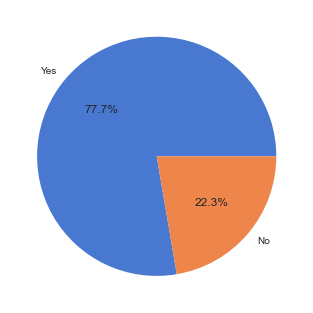

In [9]:
plt.pie(data.Loyal_Customer.value_counts(), labels = ["Yes", "No"], colors = sns.color_palette("muted"), autopct = '%1.1f%%')

<AxesSubplot:>

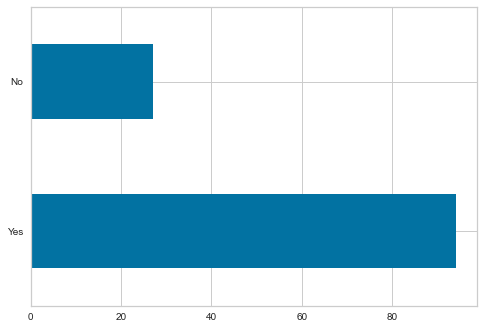

In [10]:
data.Loyal_Customer.value_counts()
data['Loyal_Customer'].value_counts().plot(kind='barh')

In [11]:
data.Loyal_Customer.value_counts()

Yes    94
No     27
Name: Loyal_Customer, dtype: int64

From the data, it can be seen that loyal customers are higher, but how to increase loyal customers and increase satisfaction from the 22.3% customers.

In [12]:
df = data.copy()

In [13]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df_cat = df.copy()
df_cat.iloc[:,categorical_indexes] = df_cat.iloc[:,categorical_indexes].astype('category')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Gender                                  121 non-null    category
 1   Age                                     121 non-null    category
 2   Working_Status                          121 non-null    object  
 3   Annual_Income                           121 non-null    category
 4   Visit_Duration                          121 non-null    category
 5   How do you usually enjoy Starbucks?     121 non-null    object  
 6   Spending_Time                           121 non-null    category
 7   Outlet_Location                         121 non-null    category
 8   Member                                  121 non-null    category
 9   Frequent_Purchase                       121 non-null    category
 10  Average_Spending                        121 non-nu

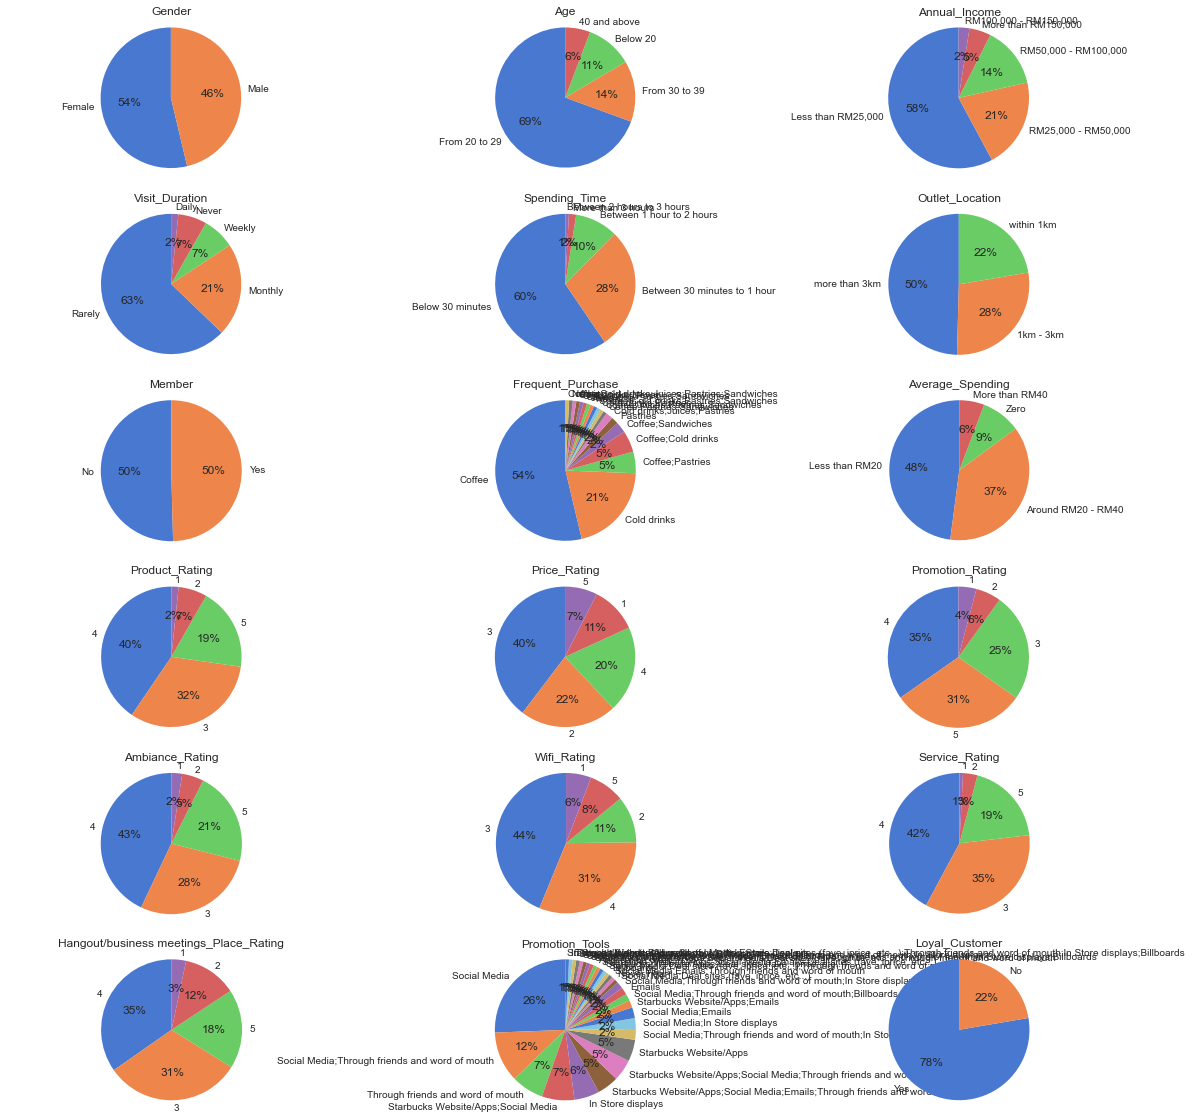

In [14]:
categ = df_cat.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("muted"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

some conclusions about the sample
* fewer male than female
* mostly aged from 20-29
* The number of members and not in this sample is the same
* most customers spend less than 30 minutes
* most customers spend less than RM20

### Average Rating

In [15]:
data.describe()

,Product_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout/business meetings_Place_Rating
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.685950,2.909091,3.818182,3.760331,3.256198,3.752066,3.520661
std,0.913173,1.072381,1.064581,0.931171,0.962020,0.829468,1.033595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see that average price rating is 3, comparing with other coffee retailers rating is 3.6, wifi rating is 3.2, rating for ambiance is 3.7 and service rating is 3.7. Overall the rating performance is quite decent, we can examine how closely correlated each rating is with if the customer is going to visit again, but first transform the loyalty column to 1 and 0, with 1 indicating will visit again and 0 indicating will not.

### Transform Loyal_Customer to 1 and 0

In [16]:
data = data.dropna().reset_index(drop=True)
data['Loyal_Customer'] = data['Loyal_Customer'].replace("Yes", 1).replace("No", 0)

### Rating Variables

In [17]:
log=LogisticRegression()
x=data[['Product_Rating','Price_Rating','Promotion_Rating','Ambiance_Rating','Wifi_Rating','Service_Rating']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
y=data['Loyal_Customer']
model=log.fit(X_scaled,y)
np.array(model.coef_)

array([[ 0.47213659,  1.01208935,  0.08612373,  0.31996509, -0.03783657,
        -0.11263459]])

<AxesSubplot:>

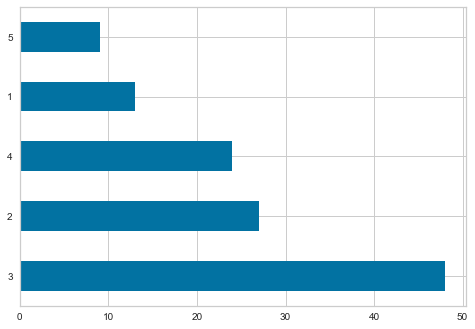

In [18]:
data.Price_Rating.value_counts()
data['Price_Rating'].value_counts().plot(kind='barh')

Although pricing is very important, its average rating is the lowest among all the rating variables, so Starbucks may need to reconsider pricing.

### Age, Working_Status and Annual_Income factors

<AxesSubplot:>

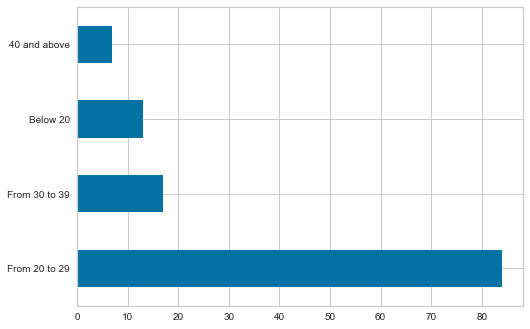

In [19]:
data.Age.value_counts()
data['Age'].value_counts().plot(kind='barh')

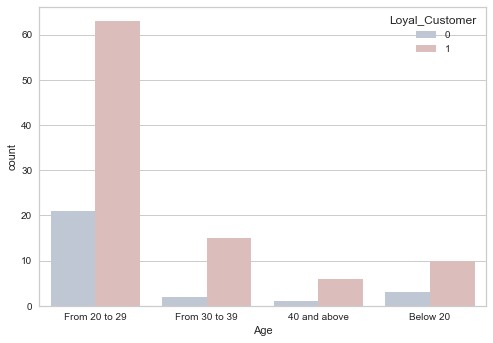

In [20]:
sns.countplot(x = 'Age', hue = 'Loyal_Customer', palette = "vlag", data = data)
plt.show()

<AxesSubplot:>

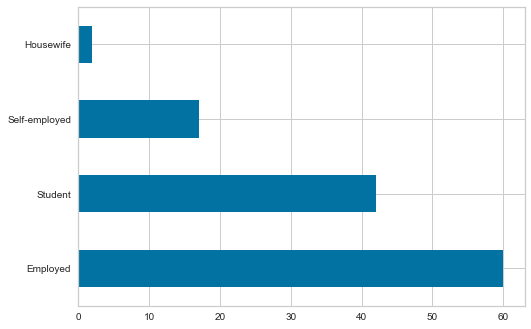

In [21]:
data.Working_Status.value_counts()
data['Working_Status'].value_counts().plot(kind='barh')

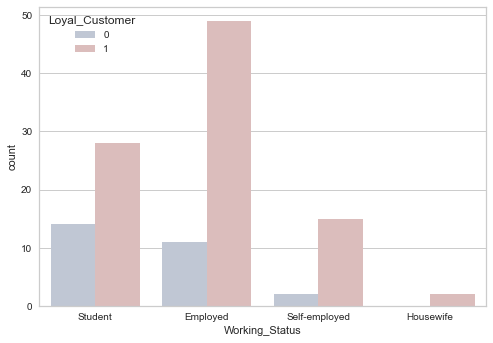

In [22]:
sns.countplot(x = 'Working_Status', hue = 'Loyal_Customer', palette = "vlag", data = data)
plt.show()

<AxesSubplot:>

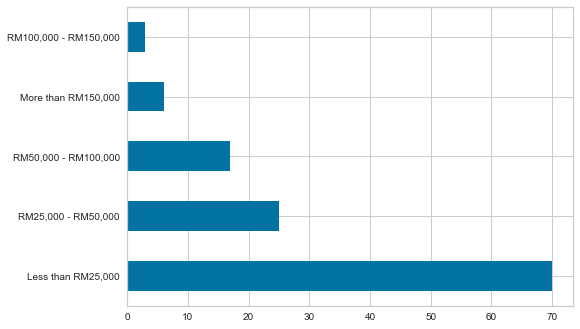

In [23]:
data.Annual_Income.value_counts()
data['Annual_Income'].value_counts().plot(kind='barh')

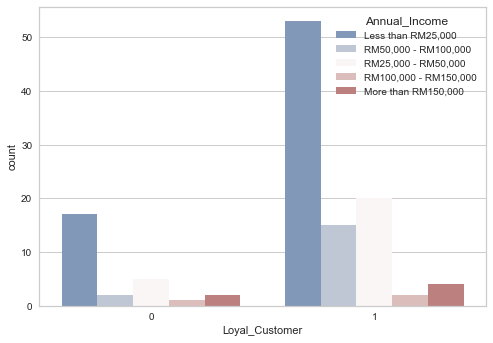

In [24]:
sns.countplot(x = 'Loyal_Customer', hue = 'Annual_Income', palette = "vlag", data = data)
plt.show()

most of the customers are from the age group of 20-29, most are working and their income is less than RM 25,000. Starbucks had to adjust prices for the lower age group, and maintain its unique value quickly and expectantly, serving its mostly young and working customers. 

## Df2

In [25]:
df2 = data.copy()

In [26]:
df2['Age'].unique()

array(['From 20 to 29', 'From 30 to 39', '40 and above', 'Below 20'],
      dtype=object)

In [27]:
df2['Working_Status'].unique()

array(['Student', 'Employed', 'Self-employed', 'Housewife'], dtype=object)

In [28]:
df2['Annual_Income'].unique()

array(['Less than RM25,000', 'RM50,000 - RM100,000',
       'RM25,000 - RM50,000', 'RM100,000 - RM150,000',
       'More than RM150,000'], dtype=object)

In [29]:
df2['Average_Spending'].unique()

array(['Less than RM20', 'Around RM20 - RM40', 'More than RM40', 'Zero'],
      dtype=object)

In [30]:
df2 = df2.dropna().reset_index(drop=True)
df2['Age'] = df2['Age'].replace("From 20 to 29", 0).replace("From 30 to 39", 1).replace("40 and above",2).replace("Below 20",3)
df2['Working_Status'] = df2['Working_Status'].replace("Student", 0).replace("Employed", 1).replace("Self-employed",2).replace("Housewife",3)
df2['Annual_Income'] = df2['Annual_Income'].replace("Less than RM25,000", 0).replace("RM50,000 - RM100,000", 1).replace("RM25,000 - RM50,000",2).replace("RM100,000 - RM150,000",3).replace("More than RM150,000",4)
df2['Average_Spending'] = df2['Average_Spending'].replace("Less than RM20", 0).replace("Around RM20 - RM40", 1).replace("More than RM40",2).replace("Zero",3)
df2['Member'] = df2['Member'].replace("Yes", 1).replace("No", 0)

### AGE, Loyal_Customer and Member

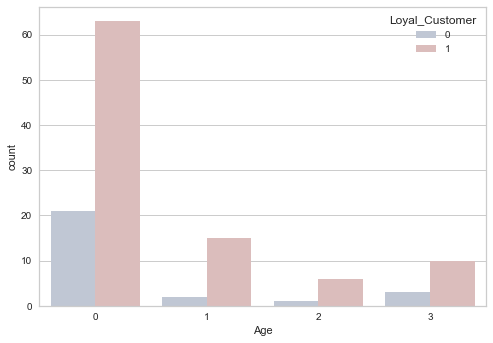

In [31]:
sns.countplot(x = 'Age', hue = 'Loyal_Customer', palette = "vlag", data = df2)
plt.show()

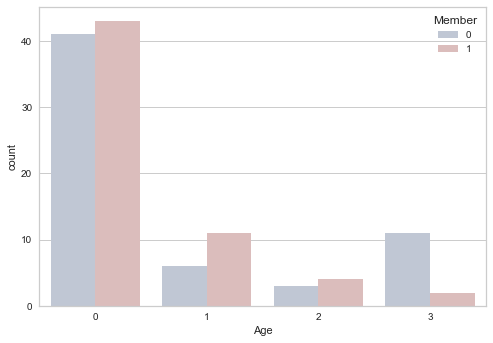

In [32]:
sns.countplot(x = 'Age', hue = 'Member', palette = "vlag", data = df2)
plt.show()

Most of the customers who have members and who are loyal are customers aged 20-29.

### AGE and Spending_Average

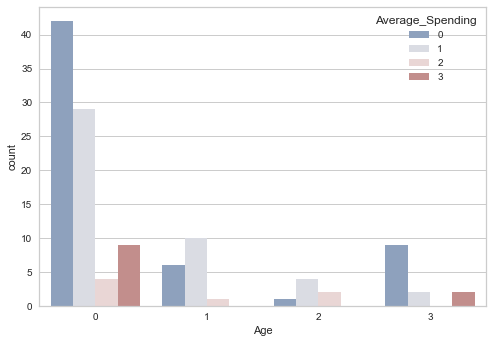

In [33]:
sns.countplot(x = 'Age', hue = 'Average_Spending', palette = "vlag", data = df2)
plt.show()

It turns out that there is still a relationship between age and spending, but maybe not very significant. Although most of Starbucks' customers are between 20-30 years old, many customers over 40 years old spend more than RM40.

### Gender And Loyal Customer

Text(0.5, 1.0, 'Loyal_Customer (Male)')

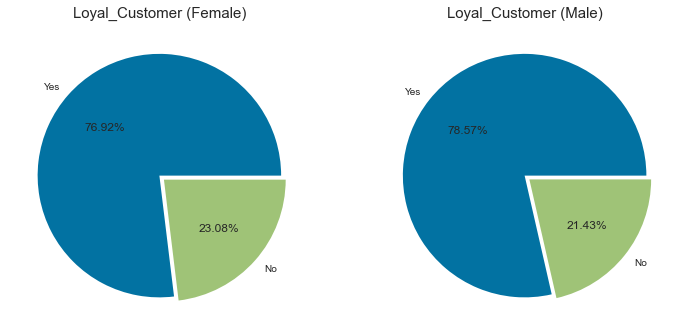

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.loc[df['Gender']=="Female",'Loyal_Customer'].value_counts(), labels=["Yes","No"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Loyal_Customer (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.loc[df['Gender']=="Male",'Loyal_Customer'].value_counts(), labels=["Yes","No"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Loyal_Customer (Male)', fontsize=15)

The distribution of loyal customers based on gender does not show any significant difference.

### Member and Royal_Customer

Text(0.5, 1.0, 'Member (No)')

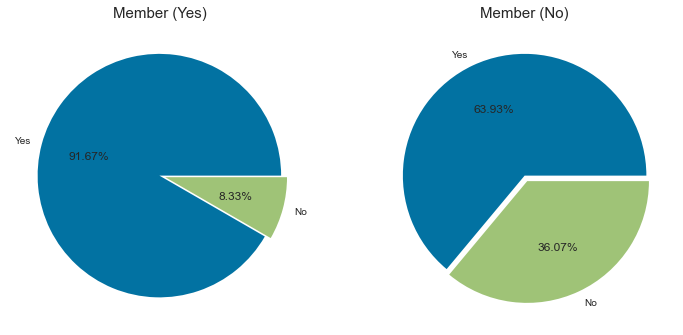

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.loc[df['Member']=="Yes",'Loyal_Customer'].value_counts(), labels=["Yes","No"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Member (Yes)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.loc[df['Member']=="No",'Loyal_Customer'].value_counts(), labels=["Yes","No"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Member (No)', fontsize=15)

Most loyal customers have card members. For customers who are not loyal customers, there are more members who have members than those who don't.

### VISIT DURATION

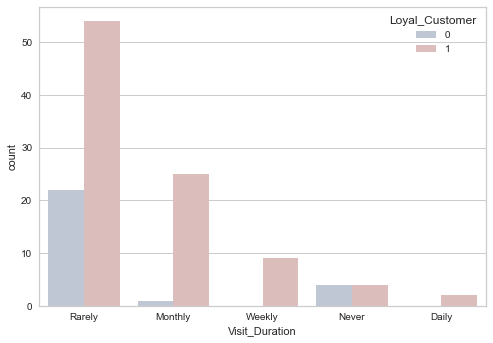

In [36]:
sns.countplot(x = 'Visit_Duration', hue = 'Loyal_Customer', palette = "vlag", data = data)
plt.show()

<AxesSubplot:ylabel='Loyal_Customer'>

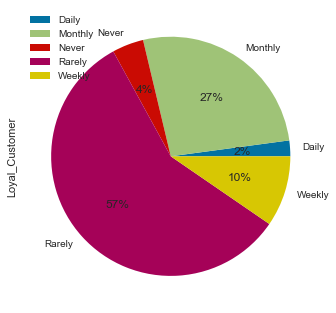

In [37]:
data.groupby(['Visit_Duration']).sum().plot(
    kind='pie', y='Loyal_Customer', autopct='%1.0f%%')

In [38]:
data['How do you usually enjoy Starbucks?'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never ',], 'Never buy', inplace = True)

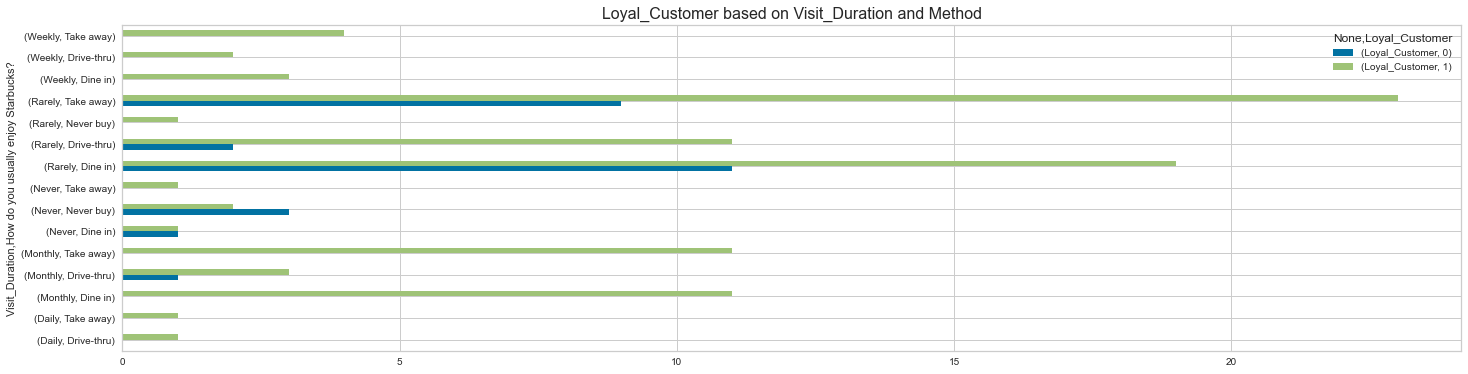

In [39]:
ab = data.pivot_table(index=["Visit_Duration","How do you usually enjoy Starbucks?"],columns=["Loyal_Customer"],aggfunc={"Loyal_Customer":"count"}).plot(kind="barh",figsize=(24,6))
total = float(len(df))
plt.title('Loyal_Customer based on Visit_Duration and Method', fontsize=16)
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1000, p.get_y()
    ab.annotate(percentage, (x, y),ha='right')
plt.show()

Loyal customers or not, come to Starbucks rarely
most loyal customers do take away and rarely come.
only loyal customers who come daily


### How do you usually enjoy Starbucks?

In [40]:
data['How do you usually enjoy Starbucks?'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never ',], 'Never buy', inplace = True)

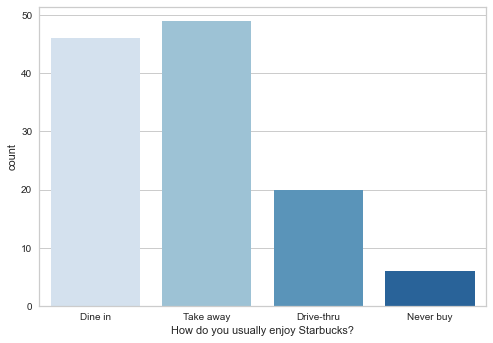

In [41]:
sns.countplot(x = 'How do you usually enjoy Starbucks?', palette = "Blues", data = data)
plt.show()

<AxesSubplot:ylabel='Loyal_Customer'>

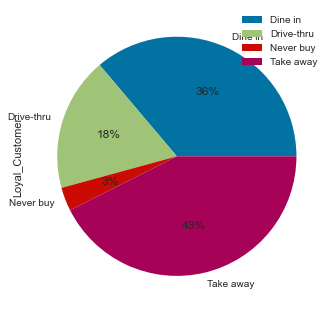

In [42]:
data.groupby(['How do you usually enjoy Starbucks?']).sum().plot(
    kind='pie', y='Loyal_Customer', autopct='%1.0f%%')

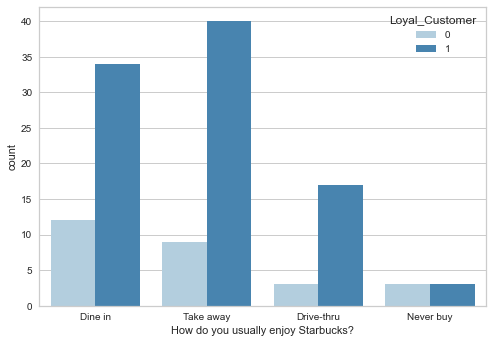

In [43]:
sns.countplot(x = 'How do you usually enjoy Starbucks?', hue = 'Loyal_Customer', palette = "Blues", data = data)
plt.show()

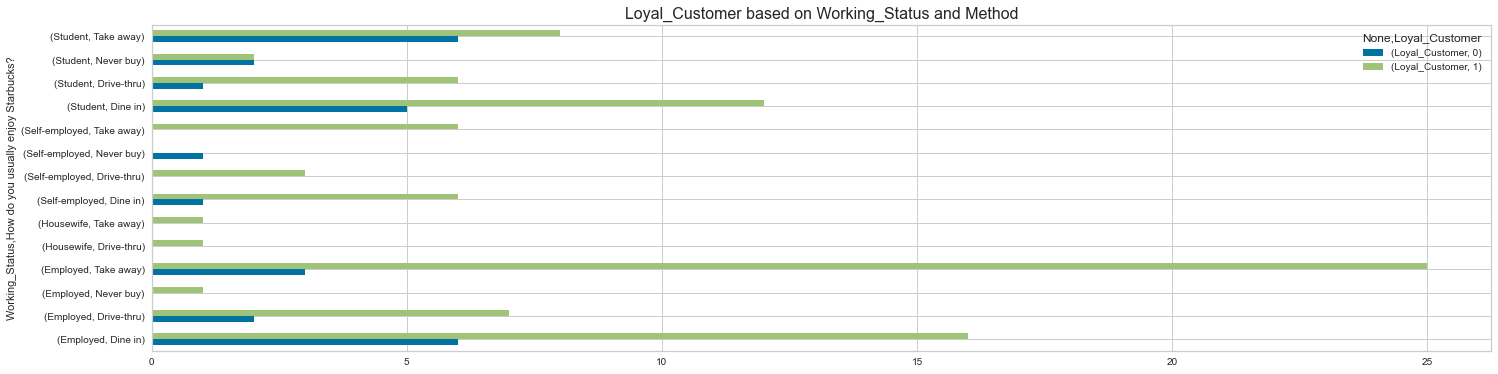

In [44]:
ax = data.pivot_table(index=["Working_Status","How do you usually enjoy Starbucks?"],columns=["Loyal_Customer"],aggfunc={"Loyal_Customer":"count"}).plot(kind="barh",figsize=(24,6))
total = float(len(df))
plt.title('Loyal_Customer based on Working_Status and Method', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1000, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

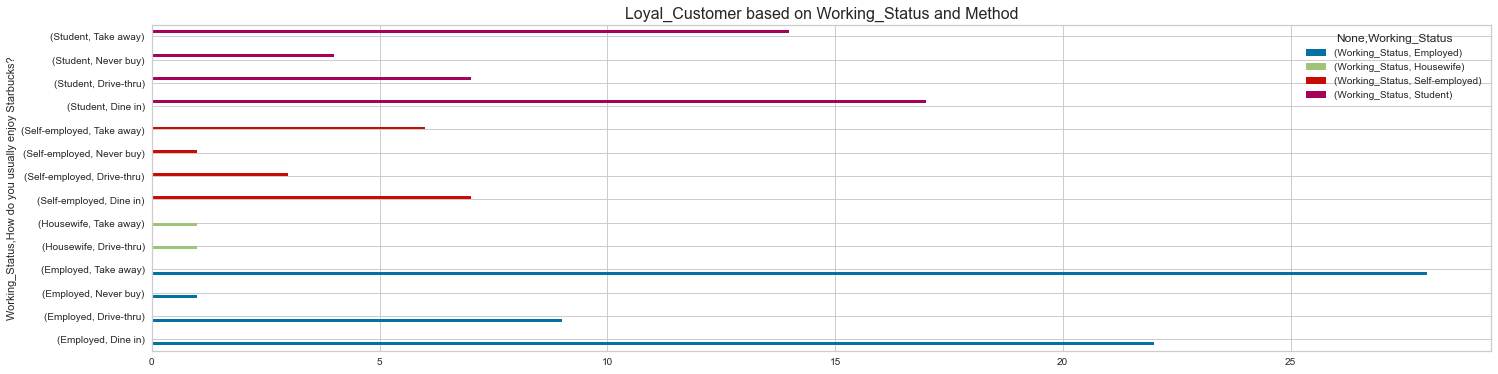

In [45]:
ax = data.pivot_table(index=["Working_Status","How do you usually enjoy Starbucks?"],columns=["Working_Status"],aggfunc={"Working_Status":"count"}).plot(kind="barh",figsize=(24,6))
total = float(len(df))
plt.title('Loyal_Customer based on Working_Status and Method', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1000, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Because most of them are employees who take away, Starbucks must increase the speed of take away services in order to improve the quality of sales. and many employees stay in place so they have to improve other services such as wifi, service, product and others.

### How much time do you normally  spend during your visit?

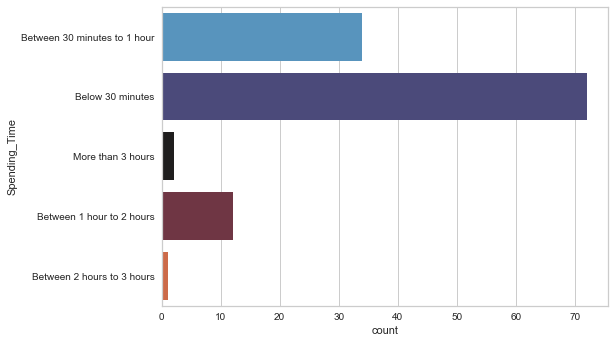

In [46]:
sns.countplot(y = 'Spending_Time', palette = "icefire", data = data)
plt.show()

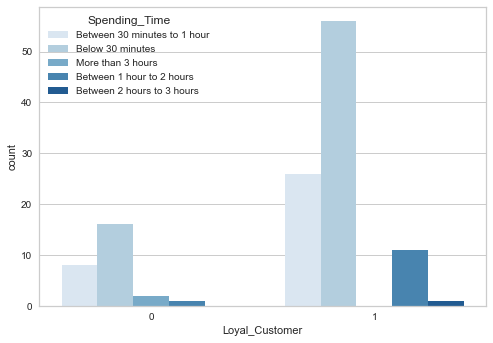

In [47]:
sns.countplot(x = 'Loyal_Customer', hue = 'Spending_Time', palette = "Blues", data = data)
plt.show()

### BoxPlot

<AxesSubplot:xlabel='Loyal_Customer', ylabel='Product_Rating'>

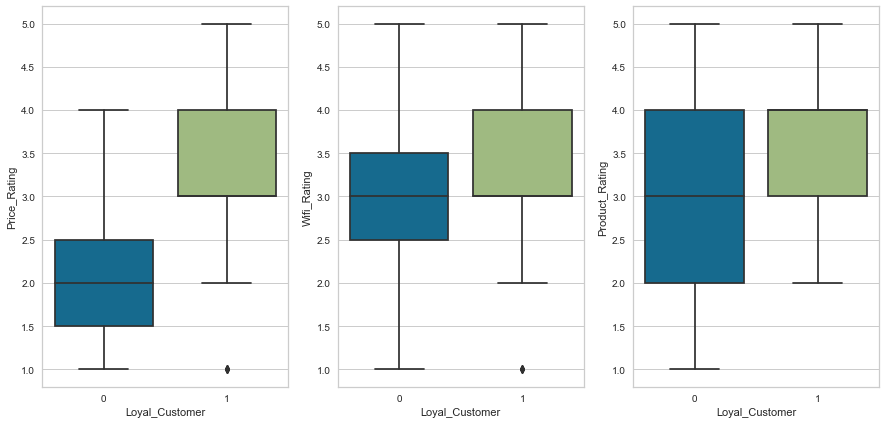

In [48]:
f, ax = plt.subplots(1, 3, figsize = (15,7))
sns.boxplot(x="Loyal_Customer", y="Price_Rating", data=data, ax = ax[0])
sns.boxplot(x="Loyal_Customer", y="Wifi_Rating", data=data, ax = ax[1])
sns.boxplot(x="Loyal_Customer", y="Product_Rating", data=data, ax = ax[2])

<AxesSubplot:xlabel='Loyal_Customer', ylabel='Hangout/business meetings_Place_Rating'>

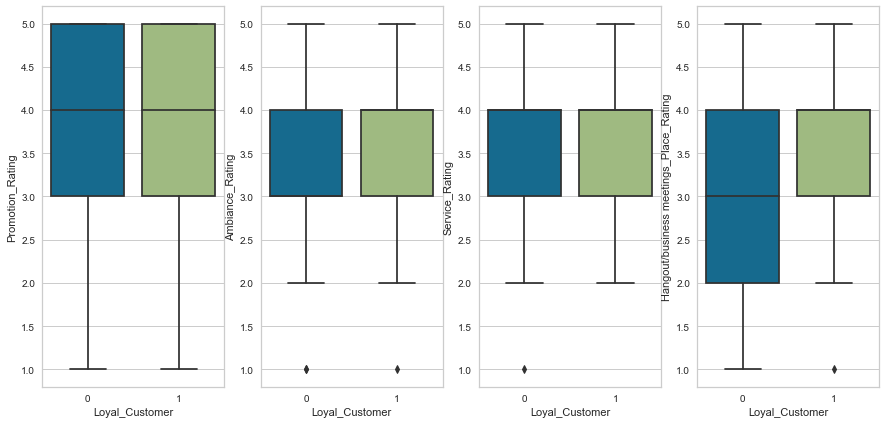

In [49]:
f, ax = plt.subplots(1, 4, figsize = (15,7))
sns.boxplot(x="Loyal_Customer", y="Promotion_Rating", data=data, ax = ax[0])
sns.boxplot(x="Loyal_Customer", y="Ambiance_Rating", data=data, ax = ax[1])
sns.boxplot(x="Loyal_Customer", y="Service_Rating", data=data, ax = ax[2])
sns.boxplot(x="Loyal_Customer", y="Hangout/business meetings_Place_Rating", data=data, ax = ax[3])

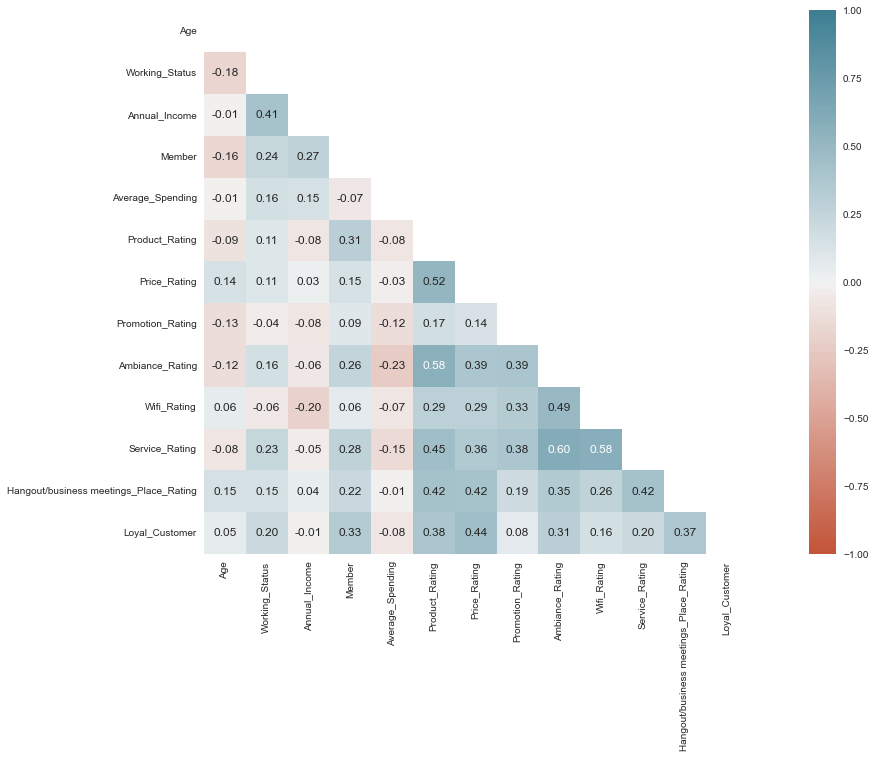

In [50]:
plt.figure(figsize=(22,10))
corr_matrix=df2.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),mask=mask,square=True,annot=True,fmt='.2f')
plt.show()

Ambiance Rating and Service Rating have the highest correlation, because the better the service, the better the atmosphere.

<AxesSubplot:xlabel='Ambiance_Rating', ylabel='Service_Rating'>

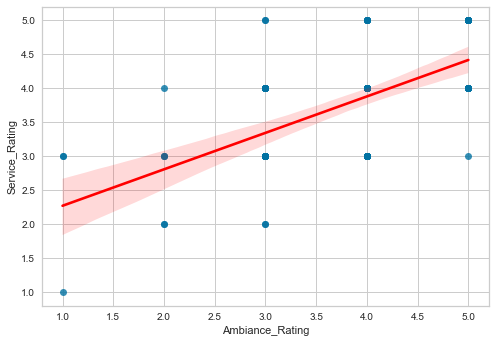

In [51]:
sns.regplot(x="Ambiance_Rating", y="Service_Rating", data=df, line_kws={"color": "red"})

### PreProcessing

In [52]:
data['Frequent_Purchase'].unique()

array(['Coffee', 'Cold drinks;Pastries', 'Coffee;Sandwiches',
       'Cold drinks', 'Coffee;Cold drinks',
       'Cold drinks;Pastries;Sandwiches',
       'Coffee;Juices;Pastries;Sandwiches', 'Coffee;Pastries;Sandwiches',
       'Coffee;Pastries', 'Cold drinks;Juices;Pastries',
       'Coffee;Cold drinks;Pastries;Sandwiches', 'Never', 'Jaws chip ',
       'cake ', 'Pastries', 'Cold drinks;Never', 'never', 'Nothing ',
       'Coffee;Cold drinks;Juices;Pastries;Sandwiches'], dtype=object)

In [53]:
cvr = CountVectorizer(tokenizer = lambda x:x.split(';'))
purchase = cvr.fit_transform(data['Frequent_Purchase'])

print(cvr.get_feature_names())

['cake ', 'coffee', 'cold drinks', 'jaws chip ', 'juices', 'never', 'nothing ', 'pastries', 'sandwiches']


In [54]:
purchase_value = pd.DataFrame(purchase.toarray(), columns = cvr.get_feature_names())
purchase_value['Never_Buy']= purchase_value.iloc[:, -6:-3].sum(axis=1)

In [55]:
purchase_value.drop(columns=['never', 'Never_Buy', 'nothing '], inplace = True)
data = pd.concat([data, purchase_value], axis = 1)
data

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,How do you usually enjoy Starbucks?,Spending_Time,Outlet_Location,Member,Frequent_Purchase,...,Hangout/business meetings_Place_Rating,Promotion_Tools,Loyal_Customer,cake,coffee,cold drinks,jaws chip,juices,pastries,sandwiches
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,3,Starbucks Website/Apps;Social Media;Emails;Dea...,1,0,1,0,0,0,0,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,2,Social Media;In Store displays,1,0,0,1,0,0,1,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,3,In Store displays;Billboards,1,0,1,0,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,3,Through friends and word of mouth,0,0,1,0,0,0,0,0
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,3,Starbucks Website/Apps;Social Media,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,4,Starbucks Website/Apps;Social Media,1,0,1,0,0,0,0,0
117,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,5,Starbucks Website/Apps;Social Media;Emails;Dea...,1,0,1,1,0,1,1,1
118,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,4,Social Media;Through friends and word of mouth...,0,0,1,1,0,0,0,0
119,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,4,Social Media;Through friends and word of mouth...,1,0,1,0,0,0,0,0


In [56]:
data['Promotion_Tools'].unique()

array(['Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)',
       'Social Media;In Store displays', 'In Store displays;Billboards',
       'Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media', 'Social Media',
       'Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth;In Store displays',
       'Starbucks Website/Apps', 'Emails', 'Social Media;Emails',
       'Through friends and word of mouth;In Store displays',
       'Social Media;In Store displays;Billboards', 'Application offer',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth;In Store displays',
       'In Store displays',
       'Social Media;Through friends and word of mouth;Billboards',
       'Starbucks Website/Apps;Social Me

In [57]:
data['Promotion_Tools'].replace([np.nan,], 'Social Media', inplace = True)

In [58]:
cvr = CountVectorizer(tokenizer = lambda x:x.split(';'))
promo = cvr.fit_transform(data['Promotion_Tools'])

print(cvr.get_feature_names())

['application offer', 'billboards', 'deal sites (fave, iprice, etc...)', 'emails', 'in store displays', 'never hear', 'social media', 'starbucks website/apps', 'through friends and word of mouth']


In [59]:
promo_value = pd.DataFrame(promo.toarray(), columns = cvr.get_feature_names())
data = pd.concat([data, promo_value], axis = 1)
data

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,How do you usually enjoy Starbucks?,Spending_Time,Outlet_Location,Member,Frequent_Purchase,...,sandwiches,application offer,billboards,"deal sites (fave, iprice, etc...)",emails,in store displays,never hear,social media,starbucks website/apps,through friends and word of mouth
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,0,0,0,1,1,0,0,1,1,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,0,0,0,0,0,1,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,0,0,1,0,0,1,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,0,0,0,0,0,0,0,0,0,1
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,0,0,0,0,0,0,0,1,1,0
117,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,1,0,1,1,1,1,0,1,1,1
118,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,0,0,0,0,0,1,0,1,0,1
119,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,0,0,1,0,0,0,0,1,0,1


In [60]:
df['How do you usually enjoy Starbucks?'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never ',], 'Never buy', inplace = True)

In [61]:
df.drop(columns=['Frequent_Purchase', 'Promotion_Tools'], inplace = True)

In [62]:
df = df.dropna().reset_index(drop=True)
df['Gender'] = df['Gender'].replace("Male", 0).replace("Female", 1)
df['How do you usually enjoy Starbucks?'] = df['How do you usually enjoy Starbucks?'].replace("Dine in", 0).replace("Take away", 1).replace("Drive-thru",2).replace("Never buy",3)
df['Member'] = df['Member'].replace("Yes", 1).replace("No", 0)
df['Age'] = df['Age'].replace("From 20 to 29", 0).replace("From 30 to 39", 1).replace("40 and above",2).replace("Below 20",3)
df['Working_Status'] = df['Working_Status'].replace("Student", 0).replace("Employed", 1).replace("Self-employed",2).replace("Housewife",3)
df['Annual_Income'] = df['Annual_Income'].replace("Less than RM25,000", 0).replace("RM50,000 - RM100,000", 1).replace("RM25,000 - RM50,000",2).replace("RM100,000 - RM150,000",3).replace("More than RM150,000",4)
df['Visit_Duration'] = df['Visit_Duration'].replace("Rarely", 0).replace("Monthly", 1).replace("Weekly",2).replace("Never",3).replace("Daily",4)
df['Spending_Time'] = df['Spending_Time'].replace("Between 30 minutes to 1 hour", 0).replace("Below 30 minutes", 1).replace("More than 3 hours",2).replace("Between 1 hour to 2 hours",3).replace("Between 2 hours to 3 hours",4)
df['Outlet_Location'] = df['Outlet_Location'].replace("within 1km", 0).replace("1km - 3km", 1).replace("more than 3km",2)
df['Average_Spending'] = df['Average_Spending'].replace("Less than RM20", 0).replace("Around RM20 - RM40", 1).replace("More than RM40",2).replace("Zero",3)
df['Loyal_Customer'] = df['Loyal_Customer'].replace("Yes", 1).replace("No", 0)

In [63]:
target = df['Loyal_Customer'].value_counts().reset_index()
target.rename(columns={'index':'Loyal_Customer','Loyal_Customer':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Loyal_Customer,freq,percentage
0,1,94,77.69
1,0,27,22.31


In [64]:
df

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,How do you usually enjoy Starbucks?,Spending_Time,Outlet_Location,Member,Average_Spending,Product_Rating,Price_Rating,Promotion_Rating,Ambiance_Rating,Wifi_Rating,Service_Rating,Hangout/business meetings_Place_Rating,Loyal_Customer
0,1,0,0,0,0,0,0,0,1,0,4,3,5,5,4,4,3,1
1,1,0,0,0,0,1,1,1,1,0,4,3,4,4,4,5,2,1
2,0,0,1,0,1,0,0,2,1,0,4,3,4,4,4,4,3,1
3,1,0,0,0,0,1,1,2,0,0,2,1,4,3,3,3,3,0
4,0,0,0,0,1,1,0,1,0,1,3,3,4,2,2,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,2,2,2,1,0,3,1,1,1,3,3,5,3,2,4,4,1
117,0,0,1,0,1,0,3,1,1,2,5,5,5,5,5,5,5,1
118,0,0,0,0,0,0,0,1,0,0,3,2,4,3,3,3,4,0
119,1,0,1,0,0,1,1,0,0,0,4,4,4,4,4,4,4,1


## MACHINE LEARNING MODELING

### XGBoost - Extreme Gradient Boosting

In [83]:

datasb = df
# Split in X and y
X, y = datasb.iloc[:,:-1], datasb.iloc[:,-1]


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=123)

In [84]:
xg_cl = XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=123, learning_rate=0.1, max_depth=5, colsample_bytree=1, subsample=1)

In [85]:
xg_cl.fit(X_train,y_train)

[21:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [86]:
xgbpreds = xg_cl.predict(X_test)

In [87]:
accuracy = float(np.sum(xgbpreds==y_test))/y_test.shape[0]
print("Accuracy: %f" % (accuracy))

Accuracy: 0.864865


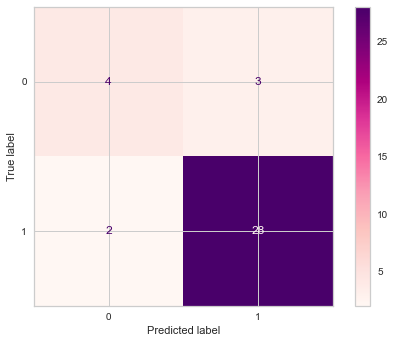

In [88]:
plot_confusion_matrix(xg_cl,X_test,y_test,cmap='RdPu')

In [89]:
print(classification_report(y_test,xgbpreds))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.90      0.93      0.92        30

    accuracy                           0.86        37
   macro avg       0.78      0.75      0.77        37
weighted avg       0.86      0.86      0.86        37



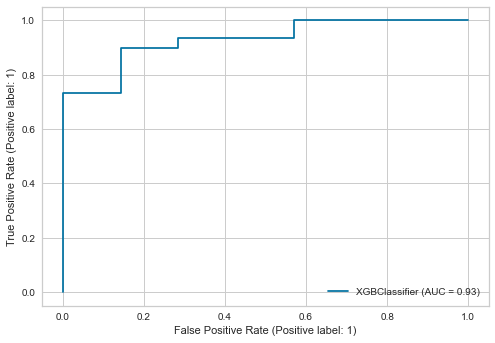

In [90]:
plot_roc_curve(xg_cl,X_test,y_test)

### Random Forest

In [74]:
def con_mat(con):
    group_names = ["True Negative","False Positive","False Negative","True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in con.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in con.flatten()/np.sum(con)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax=sns.heatmap(con, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
    ax.set_xlabel('Predicted Label',fontsize = 15)
    ax.set_ylabel('Actual Label',fontsize = 15)
    plt.show()

In [75]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.88      1.00      0.94        30

    accuracy                           0.89        37
   macro avg       0.94      0.71      0.77        37
weighted avg       0.90      0.89      0.87        37



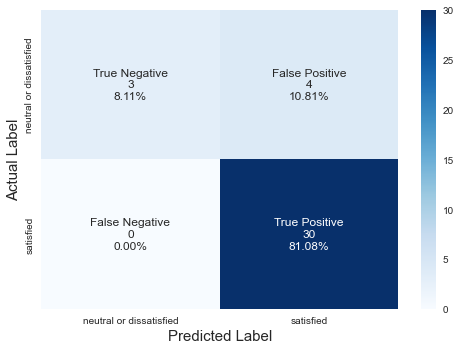

In [76]:
print(classification_report(y_test, preds))

rf_con = confusion_matrix(y_test, preds)
con_mat(rf_con)

### Support Vector Classification

In [77]:
svc=LinearSVC()
parameters={"C":[0.01,0.1,1,10]}
searcher=GridSearchCV(svc,parameters,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_svc=searcher.best_estimator_
pred_svc = best_model_svc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.83      1.00      0.91        30

    accuracy                           0.84        37
   macro avg       0.92      0.57      0.58        37
weighted avg       0.86      0.84      0.78        37



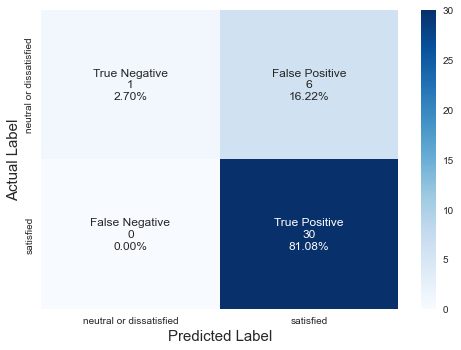

In [78]:
print(classification_report(y_test,pred_svc))

svc_con = confusion_matrix(y_test,pred_svc)
con_mat(svc_con)

### Model Conclusion
The model chosen is the Random Forest algorithm because it has the highest accuracy rate.

### Feauture Importances

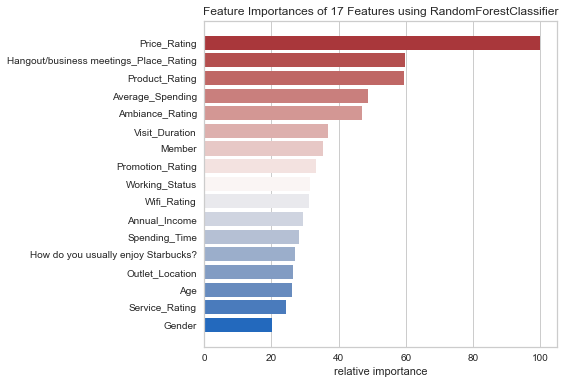

<AxesSubplot:title={'center':'Feature Importances of 17 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [79]:
fi = FeatureImportances(model, ylabel='Feautures', colormap= 'vlag')
fi.fit(X_train, y_train)
fi.show()

It can be seen here, Price_Rating is the most important attribute in predicting customer loyalty. Wify_rating doesn't really affect customer loyalty.

### CONCLUSION
In this notebook, Starbucks Malaysia customers are analyzed through a collection of data from the Survey on purchasing behavior. For this task, a visual exploration of the data was created using Bar Plots and other visualization techniques used to see the relationships between different categories of data and can easily be seen. 

With this, some great insights could be obtained about the costumers. First, with the initial exploratory data, we could conclude that:
* The costumers are well balance between Male and Female
* Most of the customers are young people, ranging between 20 and 29 years old, and generally are emplyoed and Students with income below RM 25,000.
* average spending less than 20RM
* Data is also balanced in terms of Membership
* Customers use the take away method more than others.
* monthly visitors tend to use the take away and dine in method.
* weekly visitors tend to use the take away method and most of them are loyal customers.
* price rate greatly affects customer loyalty or not, rates are associated with a higher price range, which indicates some customer dissatisfaction. so the importance of price rates and promotions for customers to attract interest and can be compared with other stores.

From these conclusions, several suggestions can be made, in a concise form, with the aim of inspiring some ideas to increase sales of Starbucks Malaysia:
* Given that most of the customers are young people, and also considering the fact that Sales and Promotion are very important to them, why not use more modern means of communication, such as Social Networks, and the like.
* most customers use drive thru or take away, whether it's best not to do food or beverage delivery services, or instant coffee products that are easy to find and don't need to visit the store.
* As we can see that a lot of customers use the drive thru or take away, why not provide more service for the dine-in to attract more people to stay. 
* since the customers are mostly young, why not make a menu or meal suitable for an older customer.